<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Composition-vs.-inheritance" data-toc-modified-id="Composition-vs.-inheritance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Composition vs. inheritance</a></span></li><li><span><a href="#When-to-use-inheritance" data-toc-modified-id="When-to-use-inheritance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>When to use inheritance</a></span></li><li><span><a href="#Composition" data-toc-modified-id="Composition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Composition</a></span></li><li><span><a href="#Composition-and-investion-of-control" data-toc-modified-id="Composition-and-investion-of-control-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Composition and investion of control</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Composition vs. inheritance

</font>
</div>

# Composition vs. inheritance
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Inheritance must be used when you need to **specialise** the behavior of a class, this means that you should not use inheritance **just to reuse** your code. In this paradign, any subclass is a special case of its superclass. Its paradigm follows the **is-an** pattern.
- Composition is pretty much everythig else! Here, instead of having an **is-an** relationship we have an **has-a** one.
    
</font>
</div>

# When to use inheritance
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>
    
- The key point here is that a Bird (hence a special case) is an Animal and that is the relationship your classes must have in order to use inheritance. Another example could be Person and Employee, Vehicle and Car, etc.

- To generalize: when a class B inherits from a class A, we often say B **is-an** A. This means that instances of B are in fact instances of A.

</font>
</div>

In [2]:
class Animal:
    """This is the class describing an abstraction of 
    what an animal is and does.

    The rationale is that, every that goes is is shared
    by the all the animal.
    """

    def eat(self):
        print("This animal eats!")

    def sleep(self):
        print("This animal eats")


class Bird(Animal):
    """This is the class describing a special type of animal.

    What is common to animal is inhertated from the Animal class.
    Wgat is special to birds is defined here by a method.
    """

    def fly(self):
        print("This animal is a bird and it can fly!")

    def sing(self):
        print("This animal is a bid and it can sing!")

In [10]:
bird_one = Bird()

In [12]:
dir(bird_one)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'eat',
 'fly',
 'sing',
 'sleep']

In [15]:
bird_one.eat()

This animal eats!


In [17]:
bird_one.sleep()

This animal eats


In [18]:
bird_one.fly()

This animal is a bird and it can fly!


In [19]:
bird_one.sing()

This animal is a bid and it can sing!


<div class="alert alert-info">
<font color=black>

- While using multiple inheritance (not shown here) keep in mind of what is called method resolution order (MRO).
-vMRO is based on **C3**, which was the MRO of the Dylan programming language, and it consists of a linearization process. MRO is based on a recursive call over the base classes, looking up each parent class to create a sequence of lists, removing duplicates and conserving the order. Once this sequence of lists is created it computes a left-to-right rule to merge them all.

</font>
</div>

In [22]:
Bird.__mro__

(__main__.Bird, __main__.Animal, object)

# Composition
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Let’s suppose that we have two classes: Car and Tire.
- We can quickly check which one is best btw composition or inheritance by asking the following two questions:
    - [x] A car has a tyre -> there is **has-a** relationship, hence use composition.
    - [ ] A car is a tyre -> there isn’t any **is-an** relationship, hence do use inheritance

</font>
</div>

In [43]:
class Car:
    def __init__(self, tyre_type):
        self.wheels_no = 4
        self.tyre = Tyre(tyre_type)
        
class Tyre():
    def __init__(self, tyre_type):
        self.tyre_type = tyre_type

In [45]:
car_1 = Car("goodyear")

In [47]:
car_1.tyre.tyre_type

'goodyear'

In [48]:
car_1.wheels_no

4

# Composition and investion of control
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Let’s suppose that we have two classes: Salary and Employee.
- We can quickly check which one is best btw composition or inheritance by asking the following two questions:
    - [x] An employee has a salary -> there is **has-a** relationship, hence use composition.
    - [ ] An employee is a tyre -> there isn’t any **is-an** relationship, hence do use inheritance

</font>
</div>

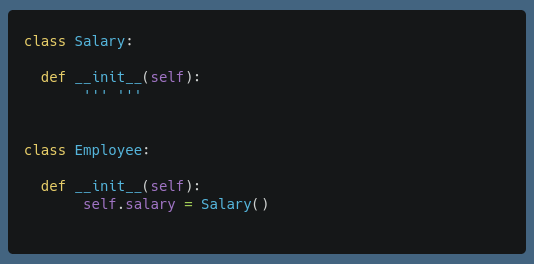

In [49]:
class Salary:
    def __init__(self):
        self.amount = 100
class Employee:
    def __init__(self):
        self.name = "Mark" 
        self.salary = Salary()

In [53]:
employee_1 = Employee()
print(employee_1.name)
print(employee_1.salary.amount)

Mark
100


<div class="alert alert-info">
<font color=black>

- If we pay attention to this implementation we will see some coupling between classes.
- In fact, if we would like to replace Salary with another class we will also need to change the Employee class, so a good advice is to combine composition with **inversion of control**.

</font>
</div>

In [54]:
class Salary:
    def __init__(self):
        self.amount = 100
class Employee:
    def __init__(self, salary):
        self.name = "Mark" 
        self.salary = salary

In [55]:
employee_1 = Employee(salary=Salary())
print(employee_1.name)
print(employee_1.salary.amount)

Mark
100


# Conclusions
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-danger">
<font color=black>

- Inheritance and composition are quite different concepts and they respond to different relationship between classes.
- If classes have a **is-a relationship** then inheritance is the right choice, if they have a **has-a relationship** then it’s a composition.
- Even if inheritance is the right choice you will still be coupling classes together, for that reason composition often produces more flexible designs, and it’s even better when combined with other patterns like inversion of control to decouple the classes.

</font>
</div>

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://python-patterns.guide/gang-of-four/composition-over-inheritance/
- https://medium.com/@carbone.nicolas.ariel/inheritance-and-composition-in-python-f84dfeffefb7

</font>
</div>